# Best Neighborhood in Pittsburgh: FINAL REPORT

Team Zel and Neal

## Introduction

Using the datasets provided by the WPRDC, we narrowed down the factors to determine the best neighborhood in Pittsburgh to the following:

- Public Assistance Income
- (Neal's Submetric)
- (Neal's Submetric)

Public Assistance Income (PAI) was included as a sub-metric because we believed it was an efficient attribute to prove the flow of income in each city, whereas the more PAI a neighborhood recieves, is presumably equivalent to a lower average income. We considered the idea that neighborhoods with a higher average income will Neighborhoods with lower percentages are considered the “best” under this sub-metric because they have fewer households depending on government income assistance.

(Explanation of Neal's Submetrics + How they relate to "best" neighborhood)

## The Metric

We determined our metric by looking at the following items:

### Public Assistance Income
For the percentage of public assistance, we calculated it by dividing the total households on PAI by the total households in each neighborhood and multiplying by 100. To normalize the metric, we created a 0–1 "point system", where a lower score indicates less reliance on public assistance and a higher ranking for economic stability. This helped us compare neighborhoods fairly, regardless of their size.
Some neighborhood names were unusual or did not correspond directly to recognized Pittsburgh neighborhoods, so these were treated as outliers in the analysis. Neighborhoods with very small populations were also noted, as a few households on assistance could disproportionately affect the percentage.

After applying this metric, the neighborhood with the lowest percentage of households receiving public assistance (the “winner” for this submetric) is Charter’s City, while neighborhoods with higher percentages show greater reliance on assistance. This submetric provides a useful perspective on economic stability across Pittsburgh neighborhoods, even if it is only one part of the overall comparison.

### (Neal's Submetric)

### (Neal's Submetric)

## So The Best Neighborhood Is.....

blah blah blah

## CONCLUSION

blah blah blah

- something about being surprised that squirell hill did/did not win

## DATA

We start by importing pandas and getting matplotlib ready to go. Then we import the data as follows:

pai_csv -> pai_data = This is the pai data

In [7]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pai_csv = "https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/38a5632d-1355-492c-8735-51bf68bdff13/download/acs_misc_2014.csv"
pai_data = pd.read_csv(pai_csv, encoding="latin1")




We then inspect the data by printing it,and then only keeping the relevant columns.

In [8]:
print(pai_data.columns)

pai_data = pai_data[['Neighborhood', 
                     'Estimate; Total:', 
                     'Estimate; Total: - With public assistance income']]

pai_data = pai_data.rename(columns={
    'Neighborhood': 'neighborhood',
    'Estimate; Total:': 'total_households',
    'Estimate; Total: - With public assistance income': 'public_assist'
})


Index(['Neighborhood', 'Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; Total: - With public assistance income',
       'Margin of Error; Total: - With public assistance income',
       'Estimate; Total: - No public assistance income',
       'Margin of Error; Total: - No public assistance income'],
      dtype='object')


Then we calculate the percentage and normalize the data, then plot it.

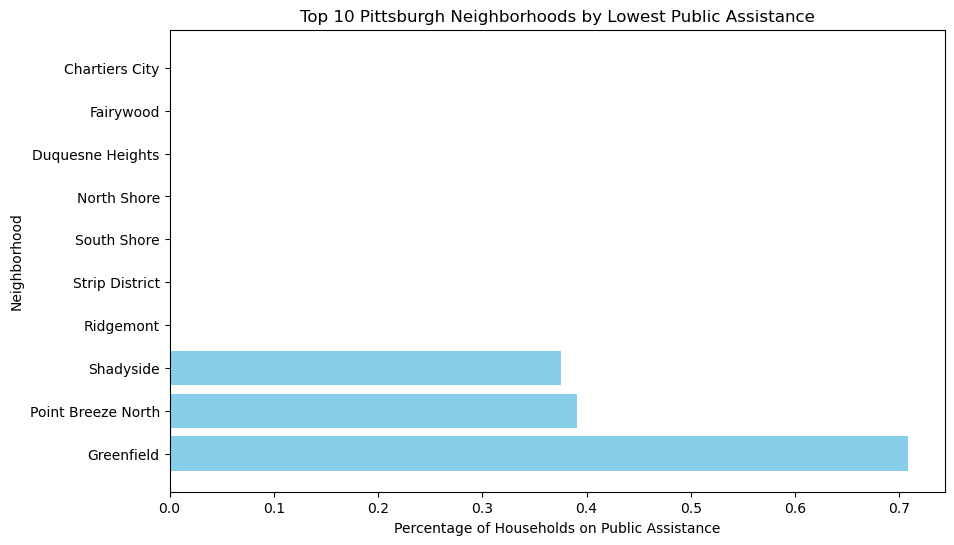

In [13]:

pai_data = pai_data.dropna(subset=['total_households', 'public_assist'])


pai_data['pct_public_assist'] = (pai_data['public_assist'] / pai_data['total_households']) * 100

vals = pai_data['pct_public_assist']
pai_data['pai_score'] = 1 - ((vals - vals.min()) / (vals.max() - vals.min()))

import matplotlib.pyplot as plt

pai_data_sorted = pai_data.sort_values(by='pct_public_assist', ascending=True)


plt.figure(figsize=(10,6))
plt.barh(pai_data_sorted['neighborhood'].head(10), pai_data_sorted['pct_public_assist'].head(10), color='skyblue')
plt.xlabel('Percentage of Households on Public Assistance')
plt.ylabel('Neighborhood')
plt.title('Top 10 Pittsburgh Neighborhoods by Lowest Public Assistance')
plt.gca().invert_yaxis()  # Highest ranked on top
plt.show()

